In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
total = pd.read_csv('../data/total_mods.csv', header=1)[1:]

In [3]:
total = total.rename({'Count': 'PubMed articles'}, axis=1)

In [73]:
total = total[1:22]

In [74]:
total

,Year,Count
2,2021,3770
3,2020,3224
4,2019,2661
5,2018,2437
6,2017,2390
7,2016,2160
8,2015,2219
9,2014,2122
10,2013,1823
11,2012,1735


In [36]:
mods = pd.read_excel('../data/rna_mods_pubmed_final_141022.xlsx')

In [37]:
mods = mods.rename({'modification': 'mod', 'code': 'Modification', 'pubmed': 'PubMed articles'}, axis=1)

In [8]:
mods = mods[:30]

In [38]:
mods = mods[~mods['Modification'].isin(['Um', 'Cm', 'Am', 'Gm'])]

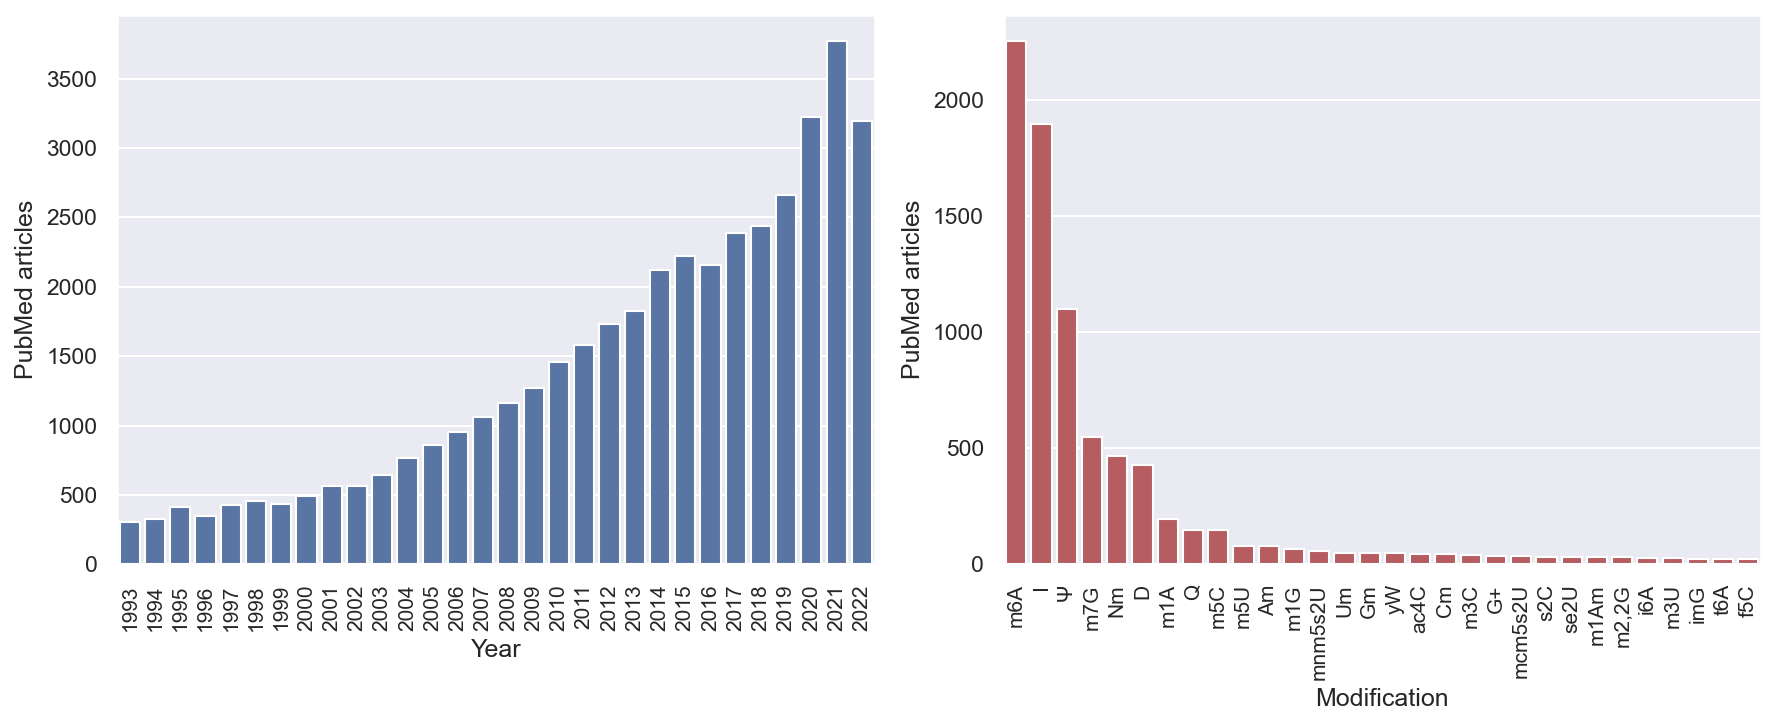

In [21]:
sns.set()

fig, ax = plt.subplots(1, 2, figsize=(12,5), dpi=150, layout='tight')

sns.barplot(ax=ax[0], x=total['Year'], y=total['PubMed articles'], color='b')
ax[0].set_xticks(range(len(total['Year'].to_list())))
ax[0].set_xticklabels(total['Year'].to_list()[::-1], rotation=90, horizontalalignment='center', fontdict={'fontsize': 10})

sns.barplot(ax=ax[1], x=mods['Modification'], y=mods['PubMed articles'], color='r')
ax[1].set_xticks(range(len(mods['Modification'].to_list())))
ax[1].set_xticklabels(mods['Modification'].to_list(), rotation=90, horizontalalignment='center', fontdict={'fontsize': 10});

plt.savefig('../rna_mods_rev_graph1.png', bbox_inches='tight')

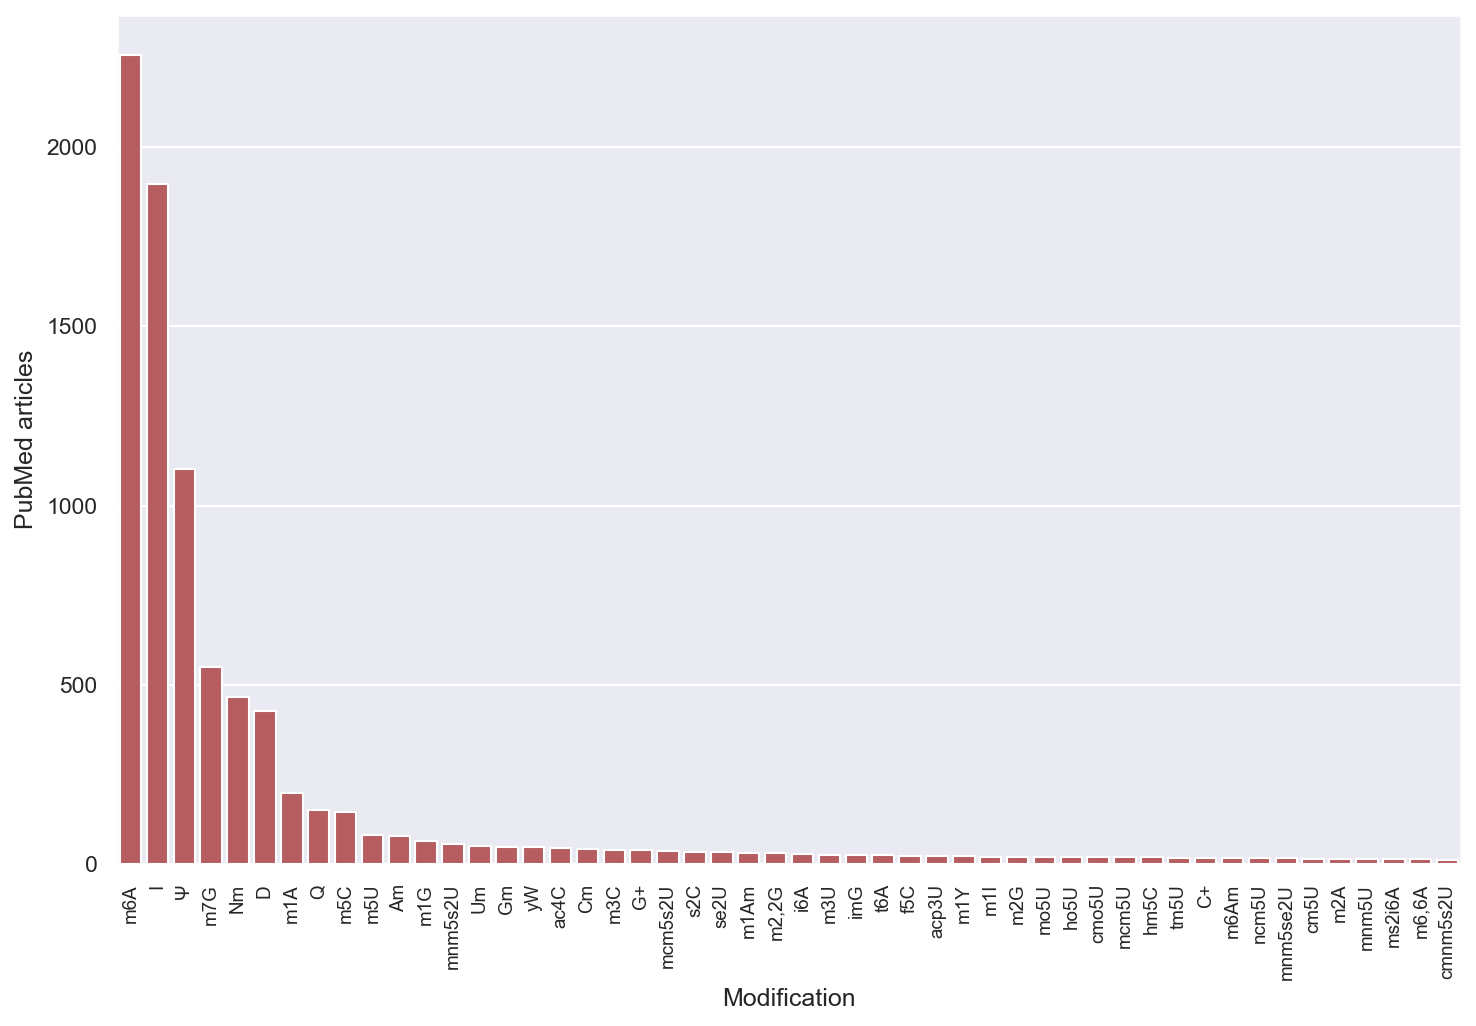

In [14]:
sns.set()

fig, ax = plt.subplots(figsize=(10,7), dpi=150, layout='tight')

sns.barplot(ax=ax, x=mods['Modification'], y=mods['PubMed articles'], color='r')
ax.set_xticks(range(len(mods['Modification'].to_list())))
ax.set_xticklabels(mods['Modification'].to_list(), rotation=90, horizontalalignment='center', fontdict={'fontsize': 9});

plt.savefig('../rna_mods_rev_graph1b_v4.png', bbox_inches='tight')

In [4]:
vec = pd.read_excel('../data/res2.xlsx')

In [5]:
vec['mod'] = vec['mod'].map(mods.set_index('mod')['Modification'])

In [6]:
vec = vec[~vec['mod'].isin(['Am', 'Um', 'Gm', 'Cm'])]

In [7]:
import re
f = re.compile(r'[0-9]+')

In [8]:
def to_arr(v):
    return np.array([int(i) for i in f.findall(v)])

In [9]:
to_arr('[703 376 156 111  54  29  21  19   6   2   1   0   0   1   2   0   2   1\n   3   1   0   2]')

array([703, 376, 156, 111,  54,  29,  21,  19,   6,   2,   1,   0,   0,
         1,   2,   0,   2,   1,   3,   1,   0,   2])

In [10]:
vec['vec'] = vec['vec'].apply(to_arr)

In [11]:
s = vec['vec'][5:].sum()

In [12]:
s

array([139, 115,  85,  97,  94,  79,  83,  72,  57,  54,  53,  37,  28,
        33,  38,  34,  39,  35,  31,  32,  26,  22])

In [13]:
vec.loc[5] = ['other', s]

C:\Users\Dynev\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


In [14]:
vec = vec[:6]

In [15]:
vec

,mod,vec
0,m6A,"[703, 376, 156, 111, 54, 29, 21, 19, 6, 2, 1, ..."
1,I,"[124, 116, 81, 105, 104, 63, 88, 57, 65, 57, 5..."
2,Ψ,"[80, 67, 43, 36, 40, 46, 37, 26, 18, 24, 30, 2..."
3,m7G,"[25, 17, 17, 15, 18, 14, 8, 13, 12, 17, 6, 13,..."
4,Nm,"[55, 37, 27, 27, 22, 24, 17, 20, 14, 18, 14, 1..."
5,other,"[139, 115, 85, 97, 94, 79, 83, 72, 57, 54, 53,..."


In [29]:
vec2 = vec.copy()

In [30]:
vec2['vec'] = vec2['vec'].apply(lambda x: x[::-1])

In [31]:
vec2['vec'] = vec2['vec'].apply(lambda x: x[:21])

In [32]:
vec2

,mod,vec
0,m6A,"[2, 0, 1, 3, 1, 2, 0, 2, 1, 0, 0, 1, 2, 6, 19,..."
1,I,"[24, 30, 27, 37, 40, 37, 39, 52, 50, 51, 50, 5..."
2,Ψ,"[16, 16, 25, 19, 30, 28, 33, 28, 32, 25, 27, 3..."
3,m7G,"[9, 3, 9, 9, 10, 12, 5, 15, 12, 11, 13, 6, 17,..."
4,Nm,"[9, 3, 11, 10, 9, 7, 5, 16, 7, 13, 14, 14, 18,..."
5,other,"[22, 26, 32, 31, 35, 39, 34, 38, 33, 28, 37, 5..."


In [39]:
mods = mods[:15]

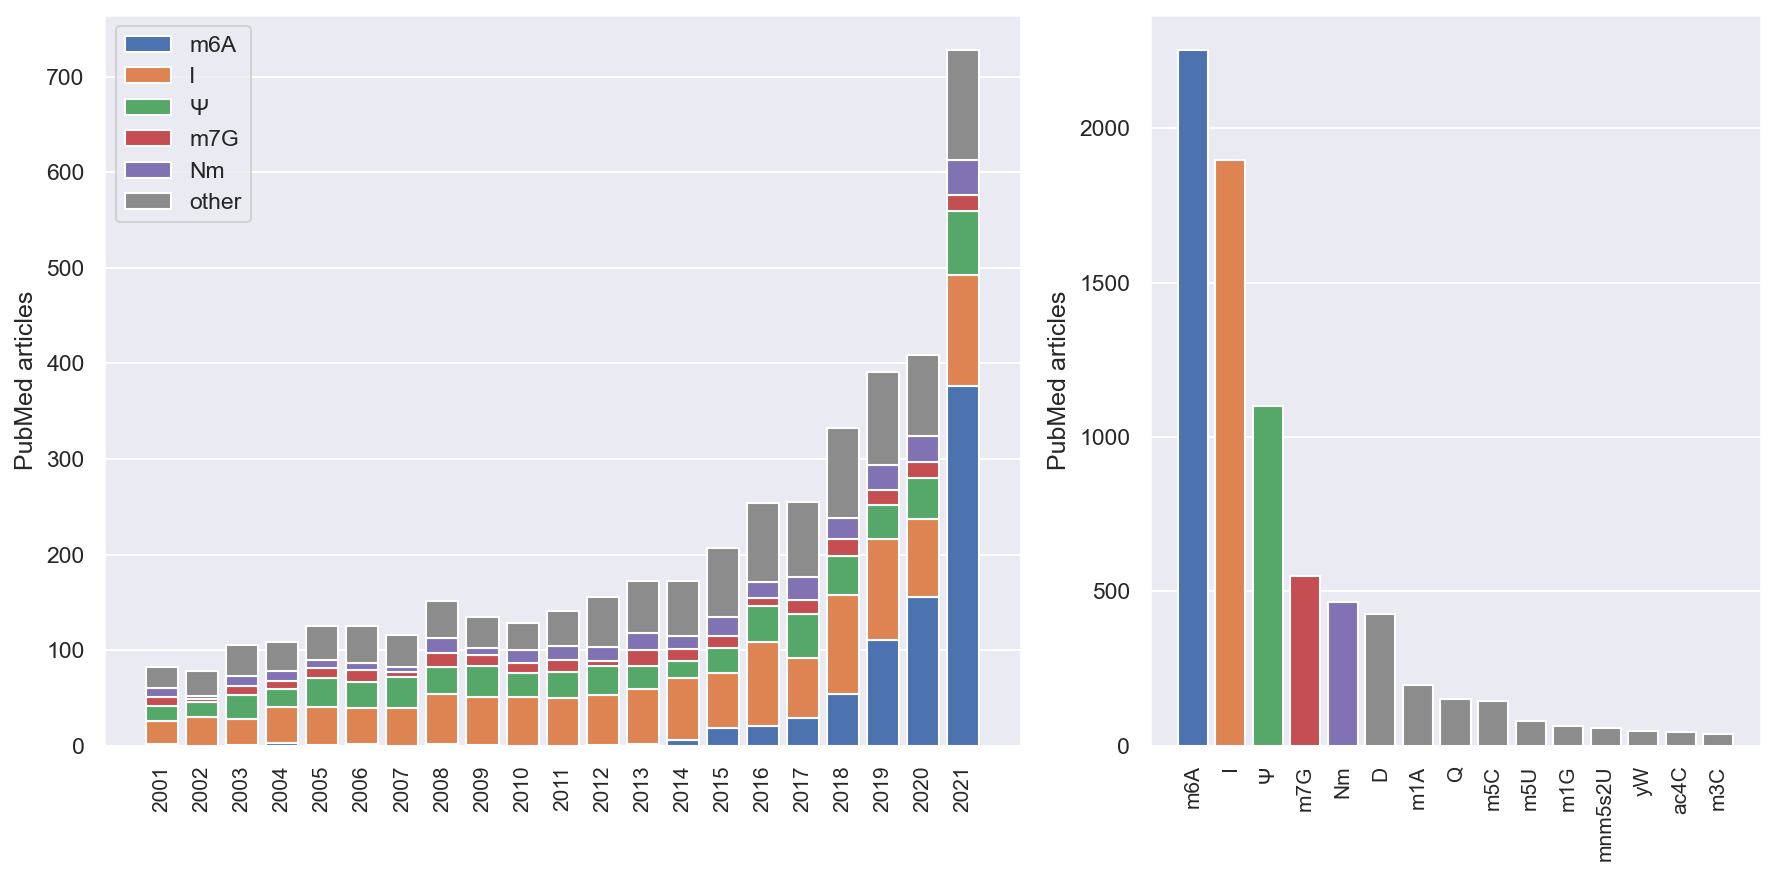

In [40]:
sns.set()

fig, ax = plt.subplots(1, 2, figsize=(12,6), dpi=150, layout='tight', gridspec_kw={'width_ratios':[3,2]})

for i in range(len(vec2)):
    ax[0].bar(x=range(2001, 2022), height=vec2['vec'][i], bottom=0 if i == 0 else vec2['vec'][:i].sum(), color=['C0', 'C1', 'C2', 'C3', 'C4', 'C7'][i], label=['m6A', 'I', 'Ψ', 'm7G', 'Nm', 'other'][i])

ax[0].grid(visible=None, which='major', axis='x')
ax[0].set_xticks(range(2001, 2022))
ax[0].set_xticklabels(range(2001, 2022), rotation=90, horizontalalignment='center', fontdict={'fontsize': 10})
ax[0].legend()
ax[0].set_ylabel('PubMed articles')

ax[1].bar(x=range(len(mods['Modification'].to_list())), height=mods['PubMed articles'], color=['C0', 'C1', 'C2', 'C3', 'C4'] + ['C7']*10)
ax[1].set_xticks(range(len(mods['Modification'].to_list())))
ax[1].set_xticklabels(mods['Modification'].to_list(), rotation=90, horizontalalignment='center', fontdict={'fontsize': 10})
ax[1].grid(visible=None, which='major', axis='x')
ax[1].set_ylabel('PubMed articles')


plt.savefig('../fig1_3.png', bbox_inches='tight')

In [77]:
len(vec2['vec'][0])

22

In [85]:
for i in range(0,120,20):
    print(i)

0
20
40
60
80
100


In [87]:
vec2['mod'].to_list()

['m6A', 'I', 'Ψ', 'm7G', 'Nm', 'other']

In [75]:
vec2['sum'] = vec2['vec'].apply(np.sum)

In [76]:
vec2

,mod,vec,sum
0,m6A,"[0, 1, 3, 1, 2, 0, 2, 1, 0, 0, 1, 2, 6, 19, 21...",1488
1,I,"[30, 27, 37, 40, 37, 39, 52, 50, 51, 50, 52, 5...",1325
2,Ψ,"[16, 25, 19, 30, 28, 33, 28, 32, 25, 27, 30, 2...",710
3,m7G,"[3, 9, 9, 10, 12, 5, 15, 12, 11, 13, 6, 17, 12...",261
4,Nm,"[3, 11, 10, 9, 7, 5, 16, 7, 13, 14, 14, 18, 14...",370
5,other,"[27, 33, 34, 35, 40, 34, 39, 33, 28, 37, 53, 5...",1283
